# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_4:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>

In [1]:
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
from collections import Counter

C:\Users\kishan\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Reading data

In [2]:
project_data=pd.read_csv('train_data.csv')
resource_data=pd.read_csv('resources.csv')

In [3]:
project_data.shape

(109248, 17)

In [4]:
resource_data.shape

(1541272, 4)

In [5]:
project_data.columns.values # Colums represents feature 

array(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects',
       'project_is_approved'], dtype=object)

In [6]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [7]:
y_value_counts=project_data['project_is_approved'].value_counts()

In [8]:
y_value_counts

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [9]:
print("% of projects accepted are",y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))

% of projects accepted are 0.8485830404217927


In [10]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039
temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()


In [11]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['project_is_approved'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   school_state  project_is_approved
46           VT             0.800000
7            DC             0.802326
43           TX             0.813142
26           MT             0.816327
18           LA             0.831245
States with highest % approvals
   school_state  project_is_approved
30           NH             0.873563
35           OH             0.875152
47           WA             0.876178
28           ND             0.888112
8            DE             0.897959


## Data Analysis


In [12]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [13]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

# ANALYZING CATEGORICAL FEATURES

## Univariate Analysis on school state

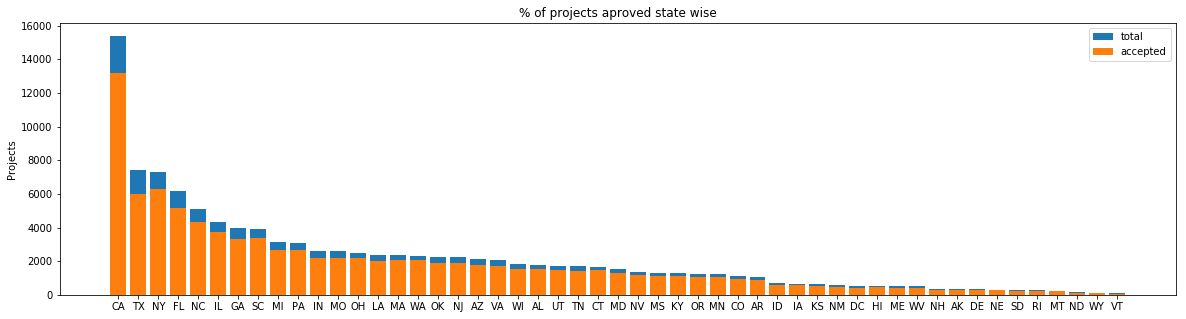

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [14]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

## Univariate analysis on teacher prefix

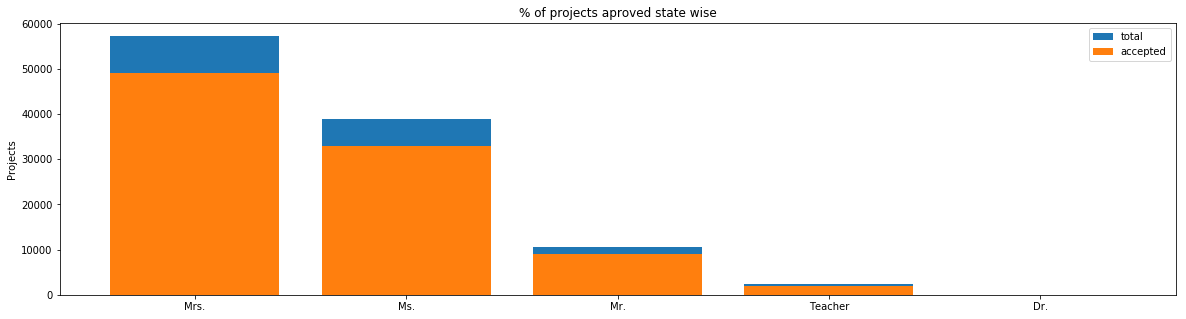

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [15]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

## Univariate analysis on Project Grade Category

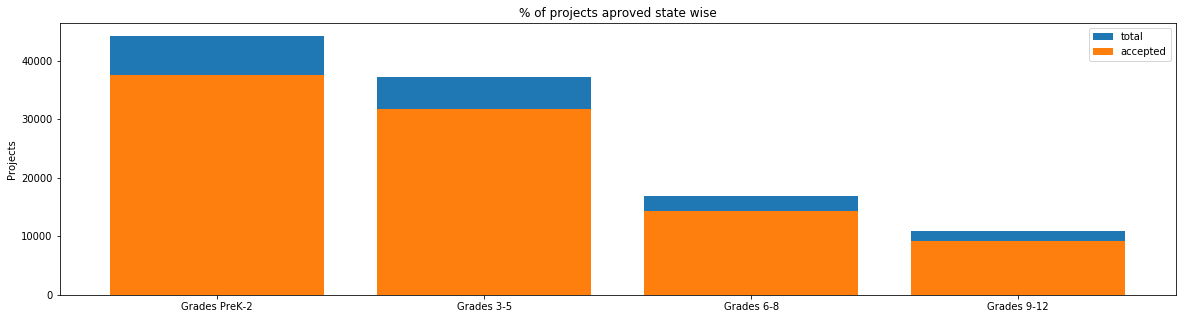

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [16]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

## Univariate analysis on Project Subject Categories

In [17]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [18]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


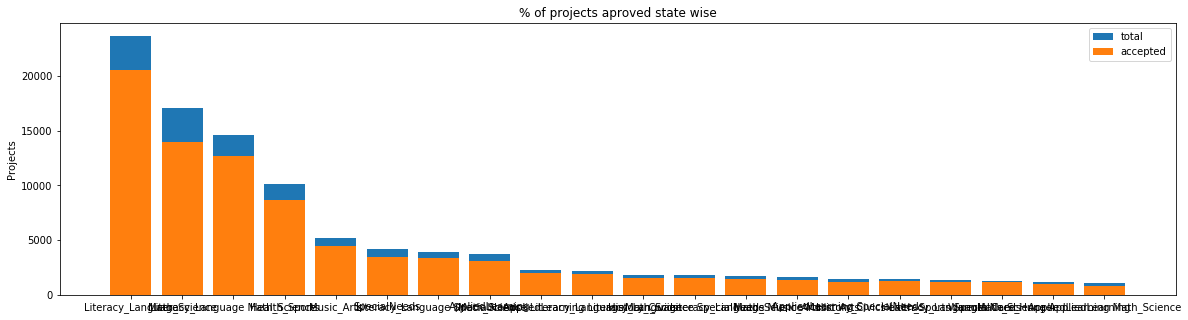

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [19]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [20]:
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

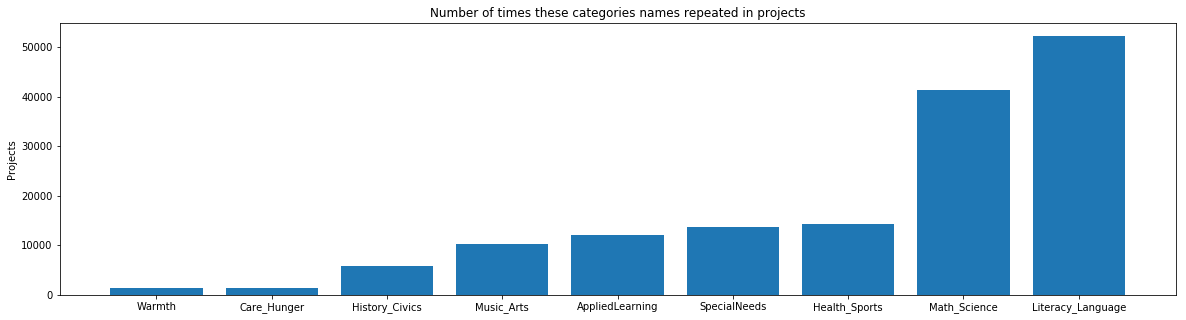

In [21]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter) 
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('Number of times these categories names repeated in projects')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [22]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


## Univariate analysis on Project Subject Subcategories

In [23]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [24]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


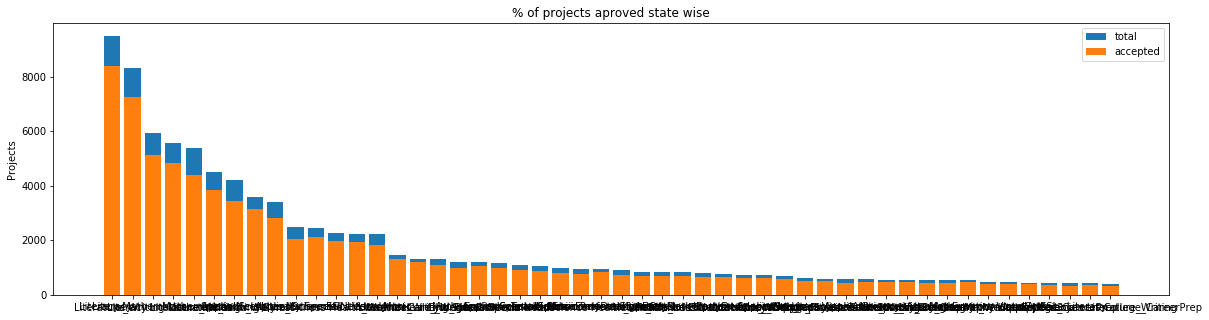

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [25]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [26]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

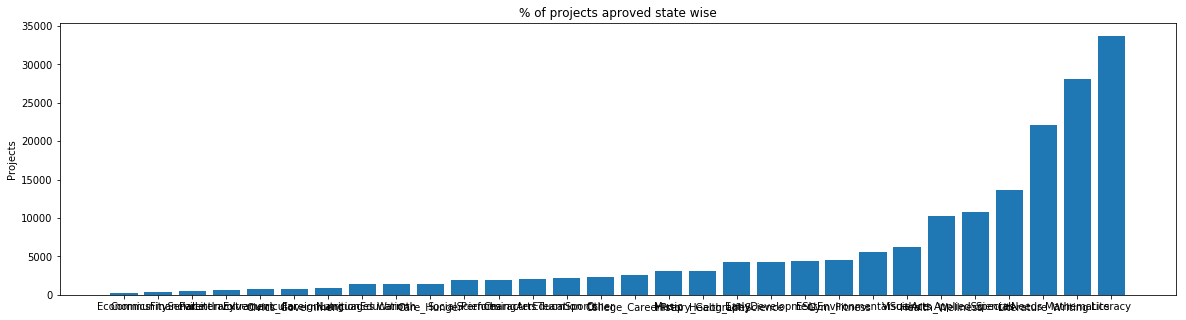

In [27]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

# 1.2.6 Univariate Analysis: Text features 

## univariate analysis on project titles

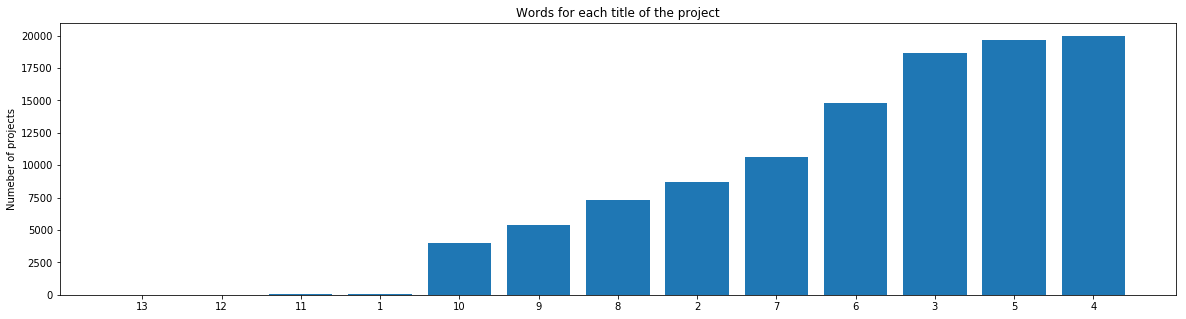

In [28]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count) 
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [29]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

#### Box plot on number of words in project title

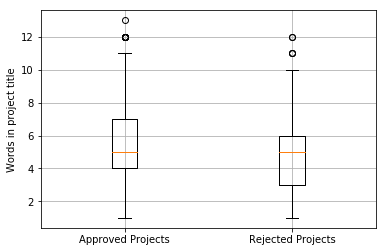

In [30]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

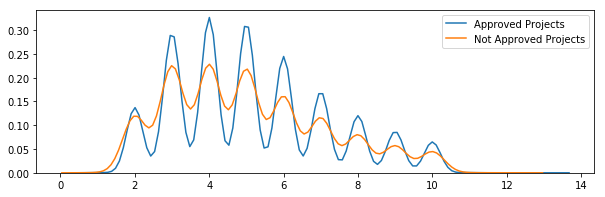

In [31]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

## Univariate anaysis on project essay 

In [32]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

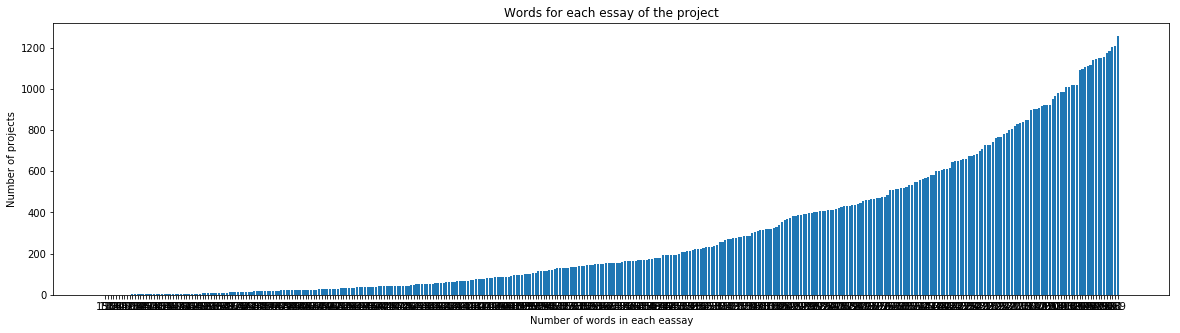

In [33]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each eassay')
plt.title('Words for each essay of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [34]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

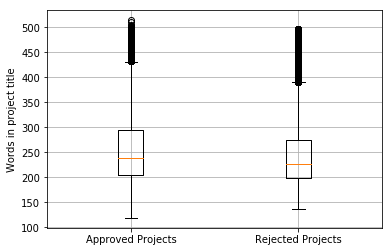

In [35]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

#### Distplot for number of words in project essay

C:\Users\kishan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


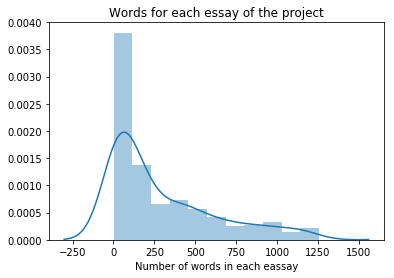

In [36]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()

## Univariate Analysis on numerical feature : price

In [37]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)
#We are calculating total sum of price and quantity for each project

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [38]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [39]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

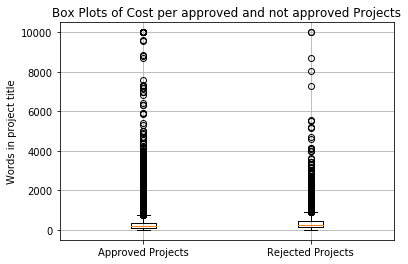

In [40]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

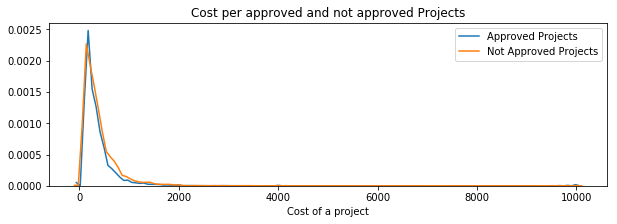

In [41]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

## univariate analysis on number of previously posted projects 

In [42]:
project_data[project_data['project_is_approved']==1][['teacher_number_of_previously_posted_projects']]

,teacher_number_of_previously_posted_projects
1,7
3,4
4,1
5,1
6,1
7,7
8,28
9,36
10,37
11,32


In [43]:
project_data[project_data['project_is_approved']==0][['teacher_number_of_previously_posted_projects']]

,teacher_number_of_previously_posted_projects
0,0
2,1
12,5
14,15
22,0
25,11
28,5
40,2
55,7
56,0


No handles with labels found to put in legend.
C:\Users\kishan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kishan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


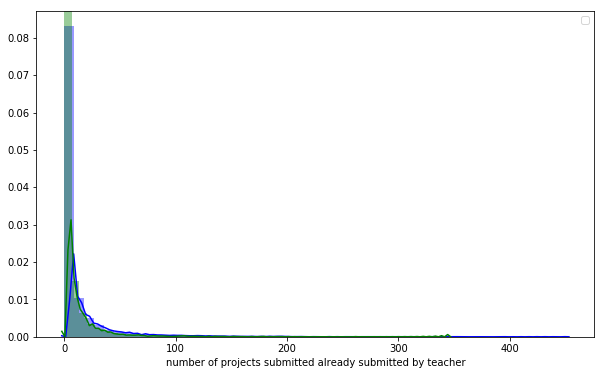

In [44]:
x=project_data[project_data['project_is_approved']==1][['teacher_number_of_previously_posted_projects']].values
y=project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values
plt.figure(figsize=(10,6))
plt.legend()
plt.xlabel("number of projects submitted already submitted by teacher")
sns.distplot(x,label="accepted",color="b")
sns.distplot(y,label="rejected",color="g")

In [45]:
#How to apply lambda function to column in python data frame https://stackoverflow.com/questions/37428218/how-to-properly-apply-a-lambda-function-into-a-pandas-data-frame-column
num_digits_present = project_data[project_data['project_resource_summary'].apply(lambda x: any(char.isdigit() for char in x))]
num_digits_absent  = project_data[project_data['project_resource_summary'].apply(lambda x: all(not char.isdigit() for char in x))]

In [46]:
y_value_counts = num_digits_present['project_is_approved'].value_counts()
print("Total Number of projects that are having numerical digit in summary and also accepted for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Total number of projects that are having numerical digit in summary but rejected for funding", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

Total Number of projects that are having numerical digit in summary and also accepted for funding  14090 , ( 89.42625031733942 %)
Total number of projects that are having numerical digit in summary but rejected for funding 1666 , ( 10.573749682660575 %)


In [47]:
y_value_counts = num_digits_absent['project_is_approved'].value_counts()
print("Total number of projects that are not having numerical digit in summary and accepted for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Total number of projects that are not having numerical digit in summary and rejected for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

Total number of projects that are not having numerical digit in summary and accepted for funding  78616 , ( 84.08847815855903 %)
Total number of projects that are not having numerical digit in summary and rejected for funding  14876 , ( 15.91152184144098 %)


# Cateorical features preprocessing

In [48]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [49]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

In [50]:
project_data['clean_categories'].value_counts() # humlog project_subject_categories ko humlog pehle hi humlog preprocess kar chuke hain

Literacy_Language                       23655
Math_Science                            17072
Literacy_Language Math_Science          14636
Health_Sports                           10177
Music_Arts                               5180
SpecialNeeds                             4226
Literacy_Language SpecialNeeds           3961
AppliedLearning                          3771
Math_Science Literacy_Language           2289
AppliedLearning Literacy_Language        2191
History_Civics                           1851
Math_Science SpecialNeeds                1840
Literacy_Language Music_Arts             1757
Math_Science Music_Arts                  1642
AppliedLearning SpecialNeeds             1467
History_Civics Literacy_Language         1421
Health_Sports SpecialNeeds               1391
Warmth Care_Hunger                       1309
Math_Science AppliedLearning             1220
AppliedLearning Math_Science             1052
Literacy_Language History_Civics          809
Health_Sports Literacy_Language   

In [51]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,grades_prek_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,grades_6_8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1


In [52]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [53]:
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 3


In [54]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [55]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [56]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

# Preprocessing text features 

In [57]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [58]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [59]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [60]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [61]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [62]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:08<00:00, 13395.39it/s]


In [63]:
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])
print("these are few random reviews")


9 love reading pure pleasure
34 ball
147 needs chromebook
these are few random reviews


In [64]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [65]:
print(project_data['essay'].values[99])
print("="*50)
print(project_data['essay'].values[199])
print("="*50)
print(project_data['essay'].values[1999])
print("="*50)
print(project_data['essay'].values[19999])
print("="*50)

My preschool students are children who are three to five years of age.  My school is in sunny San Pedro, California. The children from San Pedro come to school each morning ready to learn and grow.  There is never a dull moment in our class; my students are busy bees moving from one interest area to another.  They are eager to learn, explore, and experiment with the instructional materials and centers I set up for them.  We need more materials for the children to engage with, materials that will foster their interest in technology, literacy, math, science, art, and engineering. \r\nMy student's will learn number recognition and develop counting skills while engaging with the Learn to count picture puzzles and number Sequencing puzzles. While building with the 3-D Magnet Builders and Crystal Building Blocks, my student's mathematical skills will be supported and strengthened in concepts such as measurement, comparison, number estimation, symmetry and balance. My student's will build num

In [66]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [67]:
sent = decontracted(project_data['essay'].values[19999])
print(sent)
print("="*50)

My students come from very diverse backgrounds. Approximately 60% of our population qualifies for free or reduced lunch.\r\n\r\nThey have shown a great passion for reading, but do not have consistent, easy access to high-interest books. Our school library is open only part-time and students are often frustrated when they cannot get a new book. \r\n\r\nSome of my students are advanced readers and read complex texts, including classics. Others are struggling readers. Many of these students have connected with reading through graphic novels and other young adult novels. All students will benefit from a classroom library with books that range in complexity, topic, and genre.Research shows that students who enjoy reading and read more often do markedly better in school than their peers who do not read. Students will read if they are given access to great books, and a comfortable, quiet place and time to read them.\r\n\r\nThis project will provide dozens of high-interest texts and a comforta

In [68]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students come from very diverse backgrounds. Approximately 60% of our population qualifies for free or reduced lunch.    They have shown a great passion for reading, but do not have consistent, easy access to high-interest books. Our school library is open only part-time and students are often frustrated when they cannot get a new book.     Some of my students are advanced readers and read complex texts, including classics. Others are struggling readers. Many of these students have connected with reading through graphic novels and other young adult novels. All students will benefit from a classroom library with books that range in complexity, topic, and genre.Research shows that students who enjoy reading and read more often do markedly better in school than their peers who do not read. Students will read if they are given access to great books, and a comfortable, quiet place and time to read them.    This project will provide dozens of high-interest texts and a comfortable reading 

In [69]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students come from very diverse backgrounds Approximately 60 of our population qualifies for free or reduced lunch They have shown a great passion for reading but do not have consistent easy access to high interest books Our school library is open only part time and students are often frustrated when they cannot get a new book Some of my students are advanced readers and read complex texts including classics Others are struggling readers Many of these students have connected with reading through graphic novels and other young adult novels All students will benefit from a classroom library with books that range in complexity topic and genre Research shows that students who enjoy reading and read more often do markedly better in school than their peers who do not read Students will read if they are given access to great books and a comfortable quiet place and time to read them This project will provide dozens of high interest texts and a comfortable reading center for over 100 8th gra

In [70]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [71]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:58<00:00, 612.78it/s]


In [72]:
preprocessed_essays[19999]

'students come diverse backgrounds approximately 60 population qualifies free reduced lunch shown great passion reading not consistent easy access high interest books school library open part time students often frustrated cannot get new book students advanced readers read complex texts including classics others struggling readers many students connected reading graphic novels young adult novels students benefit classroom library books range complexity topic genre research shows students enjoy reading read often markedly better school peers not read students read given access great books comfortable quiet place time read project provide dozens high interest texts comfortable reading center 100 8th grade students students shown passion reading need access quality books comfortable safe space meet community readers bean bag chairs added current bookshelves donated rug create reading center nannan'

## Preprocessing numerical features 

In [73]:
project_data['price'].head()

0    154.60
1    299.00
2    516.85
3    232.90
4     67.98
Name: price, dtype: float64

In [74]:
# Preprocessing numerical data involves standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )

In [75]:
project_data['std_price'].head() # ab price_data ka sara value -1 aur 1 ke beech aa gaya

0   -0.390533
1    0.002396
2    0.595191
3   -0.177469
4   -0.626236
Name: std_price, dtype: float64

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))

In [77]:
project_data['nrm_price'].head()

0    0.015397
1    0.029839
2    0.051628
3    0.023228
4    0.006733
Name: nrm_price, dtype: float64

In [78]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,std_price,nrm_price
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,IN,2016-12-05 13:43:57,grades_prek_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,-0.390533,0.015397
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,mr,FL,2016-10-25 09:22:10,grades_6_8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.0,1,0.002396,0.029839


In [79]:
#Separating the class label from the preprocessed data
y = project_data['project_is_approved'].values
X = project_data.drop(['project_is_approved'], axis=1)
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,quantity,std_price,nrm_price
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,IN,2016-12-05 13:43:57,grades_prek_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,NaN,My students need opportunities to practice beg...,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.6,23,-0.390533,0.015397


### Splitting the dataset

In [80]:
# train test split
from sklearn.model_selection import train_test_split

X = X.iloc[:25000, :]
y = y[:25000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

### Vectorizing categorical data

In [81]:
#vectorizing school_state to a one hot encoding
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())
print("="*125)


X_tr_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("Shape of training dataset one hot encoding & corresponding class label ",X_tr_state_ohe.shape, y_train.shape)
print("\nShape of cv dataset one hot encoding & corresponding class label ",X_cv_state_ohe.shape, y_cv.shape)
print("\nShape of test dataset one hot encoding & corresponding class label ",X_test_state_ohe.shape, y_test.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
Shape of training dataset one hot encoding & corresponding class label  (11222, 51) (11222,)

Shape of cv dataset one hot encoding & corresponding class label  (5528, 51) (5528,)

Shape of test dataset one hot encoding & corresponding class label  (8250, 51) (8250,)


In [82]:
print(X_tr_state_ohe.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [83]:
X_tr_state_ohe

<11222x51 sparse matrix of type '<class 'numpy.int64'>'
	with 11222 stored elements in Compressed Sparse Row format>

In [84]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)
print(vectorizer.get_feature_names())
print("="*125)



X_tr_tp_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_tp_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_tp_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("Shape of training dataset teacher_prefix one hot encoding & corresponding class label ",X_tr_tp_ohe.shape, y_train.shape)
print("Shape of cv dataset teacher_prefix one hot encoding & corresponding class label ",X_cv_tp_ohe.shape, y_cv.shape)
print("Shape of test dataset teacher_prefix one hot encoding & corresponding class label ",X_test_tp_ohe.shape, y_test.shape)

['mr', 'mrs', 'ms', 'teacher']
Shape of training dataset teacher_prefix one hot encoding & corresponding class label  (11222, 4) (11222,)
Shape of cv dataset teacher_prefix one hot encoding & corresponding class label  (5528, 4) (5528,)
Shape of test dataset teacher_prefix one hot encoding & corresponding class label  (8250, 4) (8250,)


In [85]:
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict))
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())
print("="*125)



X_tr_cat_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_cat_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_cat_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("Shape of training dataset clean_categories one hot encoding & corresponding class label ",X_tr_cat_ohe.shape, y_train.shape)
print("Shape of cv dataset clean_categories one hot encoding & corresponding class label ",X_cv_cat_ohe.shape, y_cv.shape)
print("Shape of test dataset clean_categories one hot encoding & corresponding class label ",X_test_cat_ohe.shape, y_test.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of training dataset clean_categories one hot encoding & corresponding class label  (11222, 9) (11222,)
Shape of cv dataset clean_categories one hot encoding & corresponding class label  (5528, 9) (5528,)
Shape of test dataset clean_categories one hot encoding & corresponding class label  (8250, 9) (8250,)


In [86]:
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict))
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("="*125)



X_tr_subcat_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcat_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcat_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("Shape of training dataset clean_subcategories one hot encoding & corresponding class label ",X_tr_subcat_ohe.shape, y_train.shape)
print("Shape of cv dataset clean_subcategories one hot encoding & corresponding class label ",X_cv_subcat_ohe.shape, y_cv.shape)
print("Shape of test dataset clean_subcategories one hot encoding & corresponding class label ",X_test_subcat_ohe.shape, y_test.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of training dataset clean_subcategories one hot encoding & corresponding class label  (11222, 30) (11222,)
Shape of cv dataset clean_subcategories one hot encoding & corresponding class label  (5528, 30) (5528,)
Shape of test dataset clean_subcategories one hot encoding & corresponding class label  (8250, 30) (8250,)


In [87]:
vectorizer = CountVectorizer(vocabulary=list(X_train['project_grade_category'].unique()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("="*125)



X_tr_pgcat_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_pgcat_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_pgcat_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("Shape of training dataset project_grade_category one hot encoding & corresponding class label ",X_tr_pgcat_ohe.shape, y_train.shape)
print("Shape of cv dataset project_grade_category one hot encoding & corresponding class label ",X_cv_pgcat_ohe.shape, y_cv.shape)
print("Shape of test dataset project_grade_category one hot encoding & corresponding class label ",X_test_pgcat_ohe.shape, y_test.shape)

['grades_3_5', 'grades_prek_2', 'grades_6_8', 'grades_9_12']
Shape of training dataset project_grade_category one hot encoding & corresponding class label  (11222, 4) (11222,)
Shape of cv dataset project_grade_category one hot encoding & corresponding class label  (5528, 4) (5528,)
Shape of test dataset project_grade_category one hot encoding & corresponding class label  (8250, 4) (8250,)


# Vectorizing text Features

### BOW on Text featues

In [88]:
#BoW encoding for essay
vectorizer = CountVectorizer(min_df = 10, ngram_range=(1,4), max_features=100)
vectorizer.fit(X_train['essay'].values)
#print(vectorizer.get_feature_names())
#print("="*125)



X_tr_essay_bow = vectorizer.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)

print("Shape of training dataset essay_pre one hot encoding & corresponding class label ",X_tr_essay_bow.shape, y_train.shape)
print("Shape of cv dataset essay_pre one hot encoding & corresponding class label ",X_cv_essay_bow.shape, y_cv.shape)
print("Shape of test dataset essay_pre one hot encoding & corresponding class label ",X_test_essay_bow.shape, y_test.shape)

Shape of training dataset essay_pre one hot encoding & corresponding class label  (11222, 100) (11222,)
Shape of cv dataset essay_pre one hot encoding & corresponding class label  (5528, 100) (5528,)
Shape of test dataset essay_pre one hot encoding & corresponding class label  (8250, 100) (8250,)


In [89]:
#BoW encoding for project title
vectorizer = CountVectorizer(min_df = 10, ngram_range=(1,4), max_features=10000)
vectorizer.fit(X_train['project_title'].values)
#print(vectorizer.get_feature_names())
#print("="*125)



X_tr_project_title_bow = vectorizer.transform(X_train['project_title'].values)
X_cv_project_title_bow = vectorizer.transform(X_cv['project_title'].values)
X_test_project_title_bow = vectorizer.transform(X_test['project_title'].values)

print("Shape of training dataset project_title_pre one hot encoding & corresponding class label ",X_tr_project_title_bow.shape, y_train.shape)
print("Shape of cv dataset project_title_pre one hot encoding & corresponding class label ",X_cv_project_title_bow.shape, y_cv.shape)
print("Shape of test dataset project_title_pre one hot encoding & corresponding class label ",X_test_project_title_bow.shape, y_test.shape)

Shape of training dataset project_title_pre one hot encoding & corresponding class label  (11222, 1322) (11222,)
Shape of cv dataset project_title_pre one hot encoding & corresponding class label  (5528, 1322) (5528,)
Shape of test dataset project_title_pre one hot encoding & corresponding class label  (8250, 1322) (8250,)


### tfidf on text feature

In [90]:
#tfidf for essay
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)


X_tr_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)

print("Shape of training dataset essay_pre one hot encoding & corresponding class label ",X_tr_essay_tfidf.shape, y_train.shape)
print("Shape of cv dataset essay_pre one hot encoding & corresponding class label ",X_cv_essay_tfidf.shape, y_cv.shape)
print("Shape of test dataset essay_pre one hot encoding & corresponding class label ",X_test_essay_tfidf.shape, y_test.shape)

Shape of training dataset essay_pre one hot encoding & corresponding class label  (11222, 6761) (11222,)
Shape of cv dataset essay_pre one hot encoding & corresponding class label  (5528, 6761) (5528,)
Shape of test dataset essay_pre one hot encoding & corresponding class label  (8250, 6761) (8250,)


In [91]:
# Here everything is same as BOW but instead of replacing word by its count value, we replace word by its tfidf value

In [92]:
#tfidf for project_title
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['project_title'].values)


X_tr_project_title_tfidf = vectorizer.transform(X_train['project_title'].values)
X_cv_project_title_tfidf = vectorizer.transform(X_cv['project_title'].values)
X_test_project_title_tfidf = vectorizer.transform(X_test['project_title'].values)

print("Shape of training dataset project_title_pre one hot encoding & corresponding class label ",X_tr_project_title_tfidf.shape, y_train.shape)
print("Shape of cv dataset project_title_pre one hot encoding & corresponding class label ",X_cv_project_title_tfidf.shape, y_cv.shape)
print("Shape of test dataset project_title_pre one hot encoding & corresponding class label ",X_test_project_title_tfidf.shape, y_test.shape)

Shape of training dataset project_title_pre one hot encoding & corresponding class label  (11222, 733) (11222,)
Shape of cv dataset project_title_pre one hot encoding & corresponding class label  (5528, 733) (5528,)
Shape of test dataset project_title_pre one hot encoding & corresponding class label  (8250, 733) (8250,)


# w2v on text feature

### w2v  on essay

In [93]:

with open('glove_vectors', 'rb') as f:  
    model = pickle.load(f)
    glove_words =  set(model.keys())   


In [94]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): #Initially we are handling first row of essay in X_train for each review/sentence in X_train
    vector = np.zeros(300) # for each sentence in preprocessed essay, we are initilizing the vector length 300. We want vector of length 300 for each word.
    cnt_words =0; # initizing number of words for each row
    for word in sentence.split(): # for each word in a review/sentence we are finding whether it is present in glove_vector or not
        if word in glove_words:
            vector += model[word] #IF yes, then we are getting vector of size 300 and we'll store it in variable named as vector
            cnt_words += 1 # also we will keep count increase by 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))
print(avg_w2v_vectors_train[0])


100%|███████████████████████████████████████████████████████████████████████████| 11222/11222 [00:15<00:00, 702.61it/s]


11222
300
[-5.48842066e-02 -6.79150111e-02 -4.21682901e-02 -1.68915123e-01
  2.81394452e-02 -3.53979524e-03 -3.81733358e+00  1.91526591e-01
  7.65935992e-03 -2.17660523e-01  1.25808528e-01 -1.08308325e-03
  3.19861282e-02 -1.40672078e-01 -4.31475306e-02 -1.04809778e-01
 -8.31909067e-02 -1.37150449e-01  8.70293778e-02  1.01135217e-01
  6.67222567e-02 -3.28771518e-02 -4.91226245e-02  4.12700230e-02
 -4.48528401e-02 -7.64721480e-02  6.13014000e-02 -1.61080776e-01
 -1.00076591e-01 -1.07171294e-01 -3.46620398e-01 -4.67836028e-02
  1.12426560e-01 -2.27922988e-02 -1.12555413e-01 -8.26747750e-02
 -8.71773388e-02 -1.44846521e-01  4.77738710e-02 -8.26480092e-02
 -4.89204095e-02  1.41551121e-01  2.42038591e-03 -2.23977664e-01
 -5.96783619e-02 -5.53666250e-02  6.07988603e-02 -1.20565875e-01
 -4.52586466e-02 -3.21644075e-02  5.33070786e-02  4.61256365e-02
  8.20191627e-03 -2.68308952e-02  9.91849222e-02 -1.04292523e-01
  7.36119365e-02 -6.53660282e-02 -1.05297944e-01  9.05307103e-02
 -2.97189472e-0

In [95]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): 
    vector = np.zeros(300) # for each sentence in preprocessed essay, we are initilizing the vector length 300. We want vector of length 300 for each word.
    cnt_words =0; # initizing number of words for each row
    for word in sentence.split(): # for each word in a review/sentence we are finding whether it is present in glove_vector or not
        if word in glove_words:
            vector += model[word] #IF yes, then we are getting vector of size 300 and we'll store it in variable named as vector
            cnt_words += 1 # also we will keep count increase by 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))
print(avg_w2v_vectors_cv[0])


100%|█████████████████████████████████████████████████████████████████████████████| 5528/5528 [00:07<00:00, 746.61it/s]


5528
300
[ 2.80013561e-03  2.64948203e-02 -5.85664311e-02 -1.70985320e-01
  4.96231196e-02 -2.68475845e-03 -3.69402297e+00  1.63468020e-01
 -2.19004568e-02 -2.00752764e-01  8.29863534e-02 -6.66916642e-03
  2.42128818e-02 -1.51036019e-01 -1.15781907e-01 -1.67192636e-01
 -5.38798635e-02 -9.52294682e-02  8.01873642e-02  8.75103507e-02
  2.84027628e-02  4.82859770e-02 -8.48107830e-03  5.46557041e-02
 -6.95867875e-03 -7.52126804e-02  4.09537081e-02 -1.10576831e-01
 -9.45172899e-02 -3.50917061e-02 -2.83594814e-01 -4.11229757e-02
  9.78700311e-02 -6.35650743e-03 -1.22901675e-01 -4.46745047e-02
 -3.47515378e-02 -9.41053000e-02  4.24493919e-03 -5.90979146e-02
 -8.49045277e-02  1.44199807e-01  1.09728944e-02 -2.47439457e-01
 -2.83666959e-02 -8.27676676e-02  4.71537689e-02 -1.25527482e-01
 -2.81710176e-02 -3.79016189e-02  1.52162770e-03  1.31768068e-01
 -5.51598514e-03 -1.27926182e-02  9.34396101e-02 -1.52329475e-01
  5.72354213e-02 -3.56737007e-02 -6.27700345e-02  8.68208405e-02
 -7.53997027e-02

In [96]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): 
    vector = np.zeros(300) # for each sentence in preprocessed essay, we are initilizing the vector length 300. We want vector of length 300 for each word.
    cnt_words =0; # initizing number of words for each row
    for word in sentence.split(): # for each word in a review/sentence we are finding whether it is present in glove_vector or not
        if word in glove_words:
            vector += model[word] #IF yes, then we are getting vector of size 300 and we'll store it in variable named as vector
            cnt_words += 1 # also we will keep count increase by 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))
print(avg_w2v_vectors_test[0])


100%|█████████████████████████████████████████████████████████████████████████████| 8250/8250 [00:11<00:00, 737.84it/s]


8250
300
[-5.39571853e-02 -3.67348200e-02 -4.80806390e-02 -2.11838641e-01
  1.33305300e-02 -2.59312049e-02 -3.80844664e+00  2.14481126e-01
  2.12370946e-02 -2.13524404e-01  1.05919648e-01 -7.95085812e-03
  3.41966982e-02 -1.51176107e-01 -6.37989417e-02 -8.57327417e-02
 -1.15066405e-01 -6.10846309e-02  5.13250453e-02  5.32870058e-02
  1.03232385e-02 -1.03534127e-01 -8.55960309e-02  7.57586982e-02
 -2.13435739e-02 -1.00844279e-01  3.07127897e-02 -1.49297774e-01
 -1.02685939e-01 -5.19453937e-02 -3.21835949e-01 -2.80619641e-02
  7.41892489e-02  3.84562915e-03 -1.60950483e-01 -6.96220525e-02
 -9.83353641e-02 -1.89883505e-01  2.43070825e-02 -7.50948519e-02
  8.41865874e-03  1.94752718e-01  5.84099677e-02 -2.68994019e-01
 -6.47396682e-02 -7.23774148e-02  7.57598906e-02 -1.44331275e-01
 -9.04823072e-02 -2.76837455e-02  4.46458336e-02  3.44714278e-02
 -7.27613332e-02 -1.97179327e-02  1.07460247e-01 -1.20932964e-01
  1.03734883e-01 -5.30182341e-02 -7.53702121e-02  9.26365130e-02
 -9.90374363e-03

### w2v on project title

In [97]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): 
    vector = np.zeros(300) # for each sentence in preprocessed essay, we are initilizing the vector length 300. We want vector of length 300 for each word.
    cnt_words =0; # initizing number of words for each row
    for word in sentence.split(): # for each word in a review/sentence we are finding whether it is present in glove_vector or not
        if word in glove_words:
            vector += model[word] #IF yes, then we are getting vector of size 300 and we'll store it in variable named as vector
            cnt_words += 1 # also we will keep count increase by 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train_project_title.append(vector)

print(len(avg_w2v_vectors_train_project_title))
print(len(avg_w2v_vectors_train_project_title[0]))
print(avg_w2v_vectors_train_project_title[0])


100%|█████████████████████████████████████████████████████████████████████████| 11222/11222 [00:00<00:00, 28213.29it/s]


11222
300
[-9.6110e-02 -2.5788e-01 -3.5860e-01 -3.2887e-01  5.7950e-01 -5.1774e-01
 -4.1582e+00 -1.1371e-01 -1.0848e-01 -4.8885e-01  1.9931e-01 -1.0540e-01
 -4.3825e-01 -3.4483e-01 -4.5052e-01 -3.4864e-01 -4.5800e-01 -8.1554e-01
  2.2006e-01  2.0254e-01 -1.0954e-01  1.2520e-01 -5.4117e-01  3.4731e-01
 -9.9998e-02 -1.8998e-02 -1.4277e-01 -4.2481e-01 -9.4091e-03 -4.3155e-01
 -3.8769e-02  1.2147e-01  5.1988e-01 -4.9840e-01 -2.4625e-01 -5.2067e-01
 -5.8210e-02 -3.0712e-01  2.5512e-01  4.8033e-02 -2.2313e-01 -6.9182e-03
  3.9824e-02 -5.0088e-01 -1.1972e-01 -7.9045e-02  1.6880e-02 -3.4052e-01
 -2.0660e-01  8.1265e-02  1.2352e-01 -4.9007e-01  3.4946e-01 -2.9241e-01
  1.4893e-01  1.3660e-01 -9.7830e-02 -6.8472e-02 -1.0913e-02  2.8454e-03
 -1.2656e-01  3.4270e-01  1.0580e-01 -4.6151e-01  7.0133e-02 -6.1343e-02
 -1.5021e-02  1.7659e-01  1.7941e-01 -5.1377e-01 -3.1381e-01 -1.3720e-01
  4.5186e-02 -8.2259e-02  2.1515e-01 -2.1955e-01  1.0313e-01 -2.0704e-01
  1.4041e-01 -3.5151e-01  6.2316e-01 -5.7

In [98]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_cv_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): 
    vector = np.zeros(300) # for each sentence in preprocessed essay, we are initilizing the vector length 300. We want vector of length 300 for each word.
    cnt_words =0; # initizing number of words for each row
    for word in sentence.split(): # for each word in a review/sentence we are finding whether it is present in glove_vector or not
        if word in glove_words:
            vector += model[word] #IF yes, then we are getting vector of size 300 and we'll store it in variable named as vector
            cnt_words += 1 # also we will keep count increase by 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv_project_title.append(vector)

print(len(avg_w2v_vectors_cv_project_title))
print(len(avg_w2v_vectors_cv_project_title[0]))
print(avg_w2v_vectors_cv_project_title[0])


100%|███████████████████████████████████████████████████████████████████████████| 5528/5528 [00:00<00:00, 36876.76it/s]


5528
300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [99]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_test_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): 
    vector = np.zeros(300) # for each sentence in preprocessed essay, we are initilizing the vector length 300. We want vector of length 300 for each word.
    cnt_words =0; # initizing number of words for each row
    for word in sentence.split(): # for each word in a review/sentence we are finding whether it is present in glove_vector or not
        if word in glove_words:
            vector += model[word] #IF yes, then we are getting vector of size 300 and we'll store it in variable named as vector
            cnt_words += 1 # also we will keep count increase by 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test_project_title.append(vector)

print(len(avg_w2v_vectors_test_project_title))
print(len(avg_w2v_vectors_test_project_title[0]))
print(avg_w2v_vectors_test_project_title[0])


100%|███████████████████████████████████████████████████████████████████████████| 8250/8250 [00:00<00:00, 30349.66it/s]


8250
300
[-2.0838e-01 -1.4932e-01 -1.7528e-02 -2.8432e-02 -6.0104e-02 -2.6460e-01
 -4.1445e+00  6.2932e-01  3.3672e-01 -4.3395e-01  3.9899e-01 -1.9573e-01
  1.3977e-01 -2.1519e-02  3.7823e-01 -5.5250e-01 -1.1230e-01 -8.1443e-03
  2.9059e-01  6.6817e-02  1.0465e-01 -8.6943e-02 -4.8983e-02 -2.6757e-01
 -4.7038e-01  2.7469e-01  6.9245e-02 -2.7967e-02 -1.9719e-01  1.6749e-02
 -2.9681e-01  1.7838e-01  5.8374e-02 -2.4806e-01  8.5846e-02  3.5043e-01
  4.9157e-02 -1.6431e-01  5.0012e-01 -1.8053e-01  3.1422e-01  1.0671e-01
  3.1852e-02  7.4278e-02  2.7956e-01  8.0317e-02  5.4780e-02 -3.0349e-01
 -4.3215e-01  3.2417e-01  4.0856e-01  3.6192e-01  1.3445e-01 -1.2933e-01
  1.1331e-01 -1.5755e-01  3.5755e-01  3.0463e-01 -9.8488e-02  1.2032e-02
  4.5581e-01  3.7101e-01  1.4270e-01 -4.3329e-01 -1.0869e-01  4.9849e-01
  5.4455e-01  4.4352e-01  3.1804e-01  2.2171e-02 -4.1186e-01 -2.5428e-02
  2.1062e-01 -3.5830e-01  2.2028e-01 -5.5391e-01 -3.5364e-02 -5.3998e-02
  3.2172e-01 -5.1928e-01 -2.7427e-01 -4.52

### Tfidf w2v on essay

In [100]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [101]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_train_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train_essay.append(vector)

print(len(tfidf_w2v_vectors_X_train_essay))
print(len(tfidf_w2v_vectors_X_train_essay[0]))

100%|████████████████████████████████████████████████████████████████████████████| 11222/11222 [02:34<00:00, 72.83it/s]


11222
300


In [102]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [103]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_cv_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_cv_essay.append(vector)

print(len(tfidf_w2v_vectors_X_cv_essay))
print(len(tfidf_w2v_vectors_X_cv_essay[0]))

100%|██████████████████████████████████████████████████████████████████████████████| 5528/5528 [01:18<00:00, 52.71it/s]


5528
300


In [104]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [105]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_test_essay = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test_essay.append(vector)

print(len(tfidf_w2v_vectors_X_test_essay))
print(len(tfidf_w2v_vectors_X_test_essay[0]))

100%|██████████████████████████████████████████████████████████████████████████████| 8250/8250 [01:55<00:00, 71.47it/s]


8250
300


### Tfidf on title

In [106]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [107]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_train_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_train_project_title.append(vector)

print(len(tfidf_w2v_vectors_X_train_project_title))
print(len(tfidf_w2v_vectors_X_train_project_title[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11222/11222 [00:00<00:00, 11240.15it/s]


11222
300


In [108]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [109]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_cv_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_cv_project_title.append(vector)

print(len(tfidf_w2v_vectors_X_cv_project_title))
print(len(tfidf_w2v_vectors_X_cv_project_title[0]))

100%|███████████████████████████████████████████████████████████████████████████| 5528/5528 [00:00<00:00, 12984.53it/s]


5528
300


In [110]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['project_title'].values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [111]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_X_test_project_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_X_test_project_title.append(vector)

print(len(tfidf_w2v_vectors_X_test_project_title))
print(len(tfidf_w2v_vectors_X_test_project_title[0]))

100%|███████████████████████████████████████████████████████████████████████████| 8250/8250 [00:00<00:00, 11692.73it/s]


8250
300


###  Vectorizing numerical features 

In [112]:
from sklearn.preprocessing import StandardScaler

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_train = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
price_standardized_cv = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))
price_standardized_test = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Mean : 298.9892808768491, Standard deviation : 358.58419383505833


In [113]:
#concatenating all the features horizontally
from scipy.sparse import hstack
X_tr_bow = hstack((X_tr_state_ohe, X_tr_tp_ohe, X_tr_cat_ohe, X_tr_subcat_ohe, X_tr_pgcat_ohe, X_tr_essay_bow, X_tr_project_title_bow,price_standardized_train)).tocsr()
X_cv_bow = hstack((X_cv_state_ohe, X_cv_tp_ohe, X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_pgcat_ohe, X_cv_essay_bow, X_cv_project_title_bow,price_standardized_cv)).tocsr()
X_test_bow = hstack((X_test_state_ohe, X_test_tp_ohe, X_test_cat_ohe, X_test_subcat_ohe, X_test_pgcat_ohe, X_test_essay_bow, X_test_project_title_bow,price_standardized_test)).tocsr()



In [114]:
print(X_tr_bow.shape)


(11222, 1521)


In [115]:
X_tr_bow

<11222x1521 sparse matrix of type '<class 'numpy.float64'>'
	with 704458 stored elements in Compressed Sparse Row format>

### Finding best hyperparameter k 

In [116]:
def batch_predict(clf, data):
    

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1]) 
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
        
    
    return y_data_pred 


### Applying knn on BOW

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [38:02<00:00, 117.22s/it]


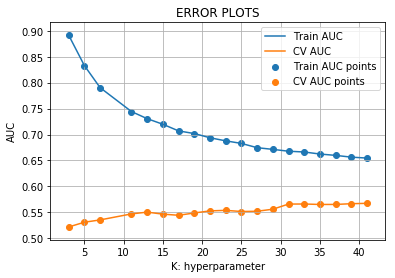

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


train_auc = [] 
cv_auc = [] 
K = [3, 5, 7, 11, 13, 15, 17, 19, 21, 23, 25,27,29,31,33,35,37,39,41]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr_bow, y_train)
    y_train_pred = batch_predict(neigh, X_tr_bow)  
    y_cv_pred = batch_predict(neigh, X_cv_bow)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))  

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

#### We are considering k=50 as hyperparameter

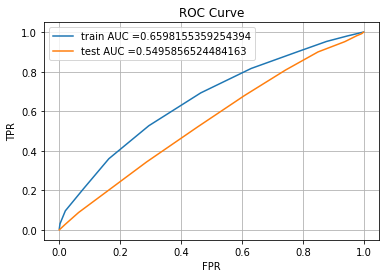

In [118]:
from sklearn.metrics import roc_curve, auc

best_k = 37
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_tr_bow, y_train)

y_train_pred = batch_predict(neigh, X_tr_bow)    
y_test_pred = batch_predict(neigh, X_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [119]:
def find_best_threshold(threshould, fpr, tpr):
    x = threshould[np.argmax(tpr*(1-fpr))]
    
    print("Maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(x,3))
    return x

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould: 
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [120]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print("="*100)

Maximum value of tpr*(1-fpr) 0.37200189552196744 for threshold 0.865
Train confusion matrix
[[1209  504]
 [4497 5012]]
Test confusion matrix
[[ 688  571]
 [3355 3636]]


In [121]:
X_tr_essay_tfidf

<11222x6761 sparse matrix of type '<class 'numpy.float64'>'
	with 1536519 stored elements in Compressed Sparse Row format>

In [122]:
X_cv_essay_tfidf

<5528x6761 sparse matrix of type '<class 'numpy.float64'>'
	with 755531 stored elements in Compressed Sparse Row format>

In [123]:
X_test_essay_tfidf

<8250x6761 sparse matrix of type '<class 'numpy.float64'>'
	with 1127008 stored elements in Compressed Sparse Row format>

### Applying knn on tfidf

In [124]:
#concatenating all the features horizontally
from scipy.sparse import hstack
X_tr_tfidf = hstack((X_tr_state_ohe, X_tr_tp_ohe, X_tr_cat_ohe, X_tr_subcat_ohe, X_tr_pgcat_ohe, X_tr_essay_tfidf, X_tr_project_title_tfidf,price_standardized_train)).tocsr()
X_cv_tfidf = hstack((X_cv_state_ohe, X_cv_tp_ohe, X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_pgcat_ohe, X_cv_essay_tfidf, X_cv_project_title_tfidf,price_standardized_cv)).tocsr()
X_test_tfidf = hstack((X_test_state_ohe, X_test_tp_ohe, X_test_cat_ohe, X_test_subcat_ohe, X_test_pgcat_ohe, X_test_essay_tfidf, X_test_project_title_tfidf,price_standardized_test)).tocsr()



100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [30:32<00:00, 96.55s/it]


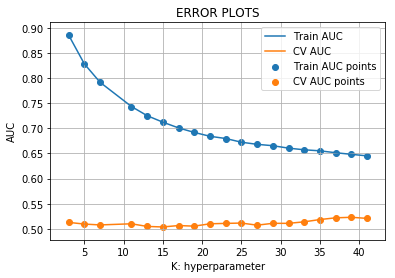

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = [] 
cv_auc = [] 
K = [3, 5, 7, 11, 13, 15, 17, 19, 21, 23, 25,27,29,31,33,35,37,39,41]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) 
    neigh.fit(X_tr_tfidf, y_train)     
    y_train_pred = batch_predict(neigh, X_tr_tfidf)  
    y_cv_pred = batch_predict(neigh, X_cv_tfidf)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))  

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

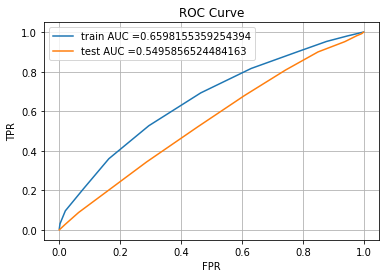

In [126]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_k = 37
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_tr_bow, y_train)


y_train_pred = batch_predict(neigh, X_tr_bow)    
y_test_pred = batch_predict(neigh, X_test_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [127]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould: 
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [128]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print("="*100)

the maximum value of tpr*(1-fpr) 0.37200189552196744 for threshold 0.865
Train confusion matrix
[[1209  504]
 [4497 5012]]
Test confusion matrix
[[ 688  571]
 [3355 3636]]


### Applying knn on Avgw2v

In [129]:
#concatenating all the features horizontally
from scipy.sparse import hstack
X_tr_w2v = hstack((X_tr_state_ohe, X_tr_tp_ohe, X_tr_cat_ohe, X_tr_subcat_ohe, X_tr_pgcat_ohe, avg_w2v_vectors_train, avg_w2v_vectors_train_project_title,price_standardized_train)).tocsr()
X_cv_w2v = hstack((X_cv_state_ohe, X_cv_tp_ohe, X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_pgcat_ohe, avg_w2v_vectors_cv, avg_w2v_vectors_cv_project_title,price_standardized_cv)).tocsr()
X_test_w2v = hstack((X_test_state_ohe, X_test_tp_ohe, X_test_cat_ohe, X_test_subcat_ohe, X_test_pgcat_ohe, avg_w2v_vectors_test, avg_w2v_vectors_test_project_title,price_standardized_test)).tocsr()



In [130]:
len(avg_w2v_vectors_cv)

5528

In [131]:
X_cv_subcat_ohe

<5528x30 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

100%|███████████████████████████████████████████████████████████████████████████████| 19/19 [1:13:55<00:00, 232.42s/it]


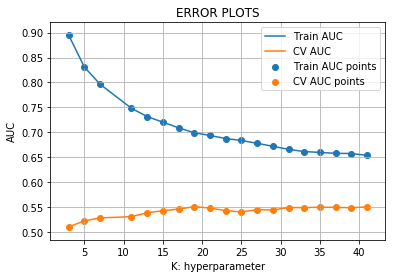

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = [] 
cv_auc = [] 
K = [3, 5, 7, 11, 13, 15, 17, 19, 21, 23, 25,27,29,31,33,35,37,39,41]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1) 
    neigh.fit(X_tr_w2v, y_train)
    y_train_pred = batch_predict(neigh, X_tr_w2v)  # probabilstic score of data point belonging to +ve class.
    y_cv_pred = batch_predict(neigh, X_cv_w2v) 
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))  

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

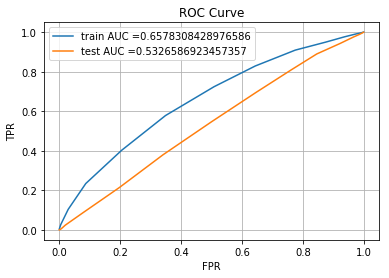

In [133]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_k = 37
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_tr_w2v, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_tr_w2v)    
y_test_pred = batch_predict(neigh, X_test_w2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) #What are thresolds?
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [134]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould: 
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [139]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print("="*100)

the maximum value of tpr*(1-fpr) 0.37668833354605463 for threshold 0.865
Train confusion matrix
[[1171  542]
 [4327 5182]]
Test confusion matrix
[[ 628  631]
 [3159 3832]]


### Applying knn on tfidfw2v

In [140]:
#concatenating all the features horizontally
from scipy.sparse import hstack
X_tr_w2v_tfidf = hstack((X_tr_state_ohe, X_tr_tp_ohe, X_tr_cat_ohe, X_tr_subcat_ohe, X_tr_pgcat_ohe, tfidf_w2v_vectors_X_train_essay, tfidf_w2v_vectors_X_train_project_title,price_standardized_train)).tocsr()
X_cv_w2v_tfidf = hstack((X_cv_state_ohe, X_cv_tp_ohe, X_cv_cat_ohe, X_cv_subcat_ohe, X_cv_pgcat_ohe, tfidf_w2v_vectors_X_cv_essay, tfidf_w2v_vectors_X_cv_project_title,price_standardized_cv)).tocsr()
X_test_w2v_tfidf = hstack((X_test_state_ohe, X_test_tp_ohe, X_test_cat_ohe, X_test_subcat_ohe, X_test_pgcat_ohe, tfidf_w2v_vectors_X_test_essay, tfidf_w2v_vectors_X_test_project_title,price_standardized_test)).tocsr()



100%|███████████████████████████████████████████████████████████████████████████████| 19/19 [1:15:48<00:00, 223.89s/it]


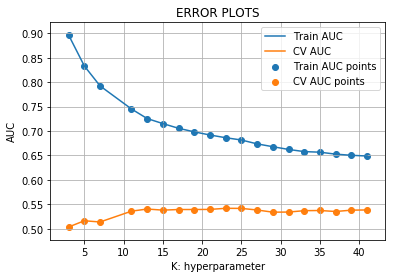

In [141]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

train_auc = [] # We are going to store auc score fpr differnt values of k on the Dtrain dataset.
cv_auc = [] 
K = [3, 5, 7, 11, 13, 15, 17, 19, 21, 23, 25,27,29,31,33,35,37,39,41]
for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    neigh.fit(X_tr_w2v_tfidf, y_train) 
    y_train_pred = batch_predict(neigh, X_tr_w2v_tfidf) 
    y_cv_pred = batch_predict(neigh, X_cv_w2v_tfidf)
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))  

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

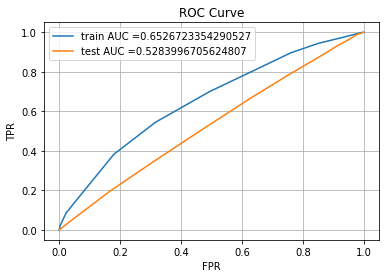

In [142]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_k = 37
neigh = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
neigh.fit(X_tr_w2v_tfidf, y_train)

y_train_pred = batch_predict(neigh, X_tr_w2v_tfidf)    
y_test_pred = batch_predict(neigh, X_test_w2v_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred) 
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.grid()
plt.show()

In [143]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould: 
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [144]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("="*100)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("="*100)
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))
print("="*100)

the maximum value of tpr*(1-fpr) 0.3725307213487551 for threshold 0.865
Train confusion matrix
[[1171  542]
 [4327 5182]]
Test confusion matrix
[[ 661  598]
 [3402 3589]]


## Conclusion:

1. k=37 gives the best knn classfier model
2. Applying knn on Avgw2v gives the best model becuse in its Consusion matrix TP+Tn value is maximum.